In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [4]:
# Charger uniquement une partie du dataset
df = pd.read_csv("../data/processed/US_Accidents_clean.csv")

# Réduire la taille (ici : 150 000 lignes)
df = df.sample(150000, random_state=42)

# Sélection des features
features = ["Visibility(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Severity"]
df = df[features].dropna()

X = df.drop("Severity", axis=1)
y = df["Severity"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle RandomForest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Évaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.05      0.01      0.02       221
           2       0.80      0.93      0.86     23963
           3       0.24      0.09      0.13      5026
           4       0.06      0.01      0.02       790

    accuracy                           0.76     30000
   macro avg       0.29      0.26      0.26     30000
weighted avg       0.68      0.76      0.71     30000



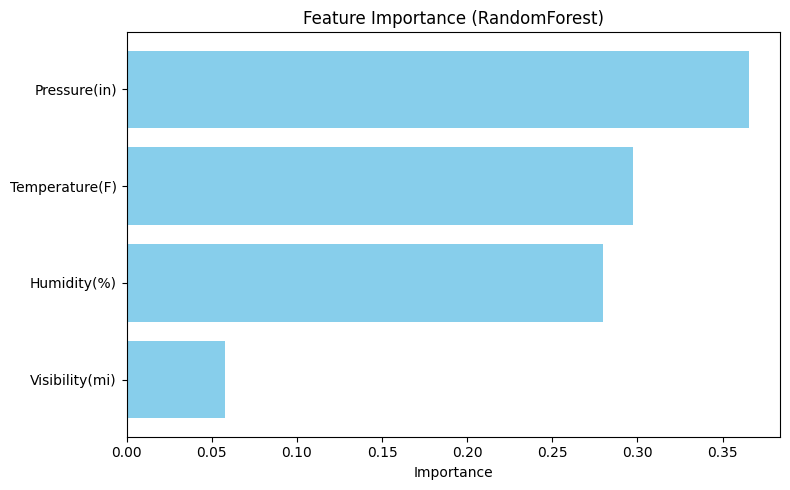

In [10]:
# Réduire le dataset pour accélérer l'entraînement
df = df.sample(150000, random_state=42)

# Sélection des features
features = ["Visibility(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)"]
df = df[features + ["Severity"]].dropna()

X = df[features]
y = df["Severity"]

# Modèle RandomForest
model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
model.fit(X, y)

# Importance des features
importances = model.feature_importances_

# Trier les features par importance décroissante
sorted_idx = importances.argsort()
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.savefig("../data/outputs/graphs/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()